In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(style='whitegrid', context='notebook', palette='Set2')

In [46]:
# read CSV
df_data  = pd.read_csv('../../data/sample.csv')
df_data = df_data.drop(columns=['wy'])
df_data = df_data.sort_values(by=['id', 'frame'])
df_data['new_frame'] = df_data['frame']/20
df_data['new_frame'] = df_data['new_frame'].astype(np.int64)

2/3[s]を1タイムステップとする

In [47]:
df_data = df_data.drop_duplicates(subset=['wx', 'wz', 'frame'])
df_data = df_data.groupby(['id', 'new_frame']).mean()
df_data = df_data.reset_index()

速度を求める

In [48]:
df_velocity = pd.DataFrame()
for i in range(max(df_data['id'])):
    person = df_data[df_data.id == i]
    person_diff = person.diff().fillna(0.)
    person_diff['dist'] = np.sqrt(person_diff.wx**2 + person_diff.wz**2)
    person_diff['vel'] = person_diff.dist / (person_diff.frame / 30)
    df_velocity = df_velocity.append(person_diff)

In [49]:
df_data['vel'] = df_velocity['vel']
df_data['dist'] = df_velocity['dist']

/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


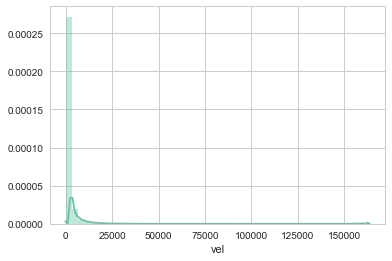

In [50]:
df_dataset = df_data.dropna()
sns.distplot(df_dataset['vel'])

一番近い障害物(人)の距離を求める

In [51]:
df_dataset.to_csv("some.csv")

人物ごとの特徴量作成

クラスタリング

ロジットモデル

In [52]:
df_dataset.describe()

,id,new_frame,frame,wx,wz,vel,dist
count,265959.000000,265959.000000,2.659590e+05,265959.000000,265959.000000,265959.000000,265959.000000
mean,128761.040096,45542.976534,9.108673e+05,1521.573226,7542.585036,1954.865065,824.453942
std,78105.498758,26345.496143,5.269097e+05,2174.299832,6138.681169,4115.787385,858.340062
min,0.000000,1.000000,2.625000e+01,-5948.290000,183.629667,0.221536,0.147691
25%,63181.000000,22954.000000,4.590822e+05,-132.562183,3966.669472,596.036668,323.002489
50%,117860.000000,44179.000000,8.835895e+05,1279.137130,5271.255000,1100.148607,614.637279
75%,193521.500000,68362.500000,1.367260e+06,2656.296688,7513.478861,1674.171609,943.048987
max,282063.000000,94784.000000,1.895684e+06,9661.510000,29374.700000,163442.074154,11214.011942
